In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:

path = "C:\\DamVanCuong\\Data analyst\\Sales-Reporting-main\\data\\" # Just put r before your normal string it converts normal string to raw string:
 # pd.read_csv("C:/Users/DeePak/Desktop/myac.csv") - change \ into / or \\ to be correct
    
dataframe = pd.read_csv(path+"sales2019_2.csv")
dataframe.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [4]:
# link single data file into one 
frames=[] 
length_allmonths=[]
for file in os.listdir(path):
    if file.endswith('.csv'):  # determine if end of file csv
        filepath= path+ file
        df_temp= pd.read_csv(filepath)
        frames.append(df_temp)
        length_1month=len(df_temp.index)
        length_allmonths.append(length_1month)
df =pd.concat(frames)
df.to_csv('C:\\DamVanCuong\\Data analyst\\Sales-Reporting-main\\annualSales2019.csv', index=False) # save
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
sum(length_allmonths) # check if "result" is correct

186850

## Task 1: Month with best sales

In [6]:
# add column month
df['month']=df['Order Date'].str[0:2] # create new column month- cut 3 key word from Orderdate fot new column
# result['month']= '' # create empty column
# str[0:2:n] - cut 0 to 2 with a gap of n
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01


In [7]:
set(df['month'])  # create a set of df to know which elements are contained 


{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Or',
 nan}

In [8]:
df= df.dropna(how ='all') # delete rows contining NaN


In [9]:
df[df['month']=='Or'] # print the row of "Or" in column month 
df = df[df['month']!='Or'] # save rows not containing 'Or' - way to delete row as well

## calculate sale = quantity odered * price each

In [10]:
# because at begin they are object- need to be converted to number to be able to calculate
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'])
df['Price Each']= pd.to_numeric(df['Price Each'])
# create new column sale = multiplication of 2 column 
df['Sales']= df['Quantity Ordered']*df['Price Each']


# want to move sale column next to Price Each column
# cut it -then insert it
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column) # (position, new name, moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [11]:
# check data type of sth - .dtype
print (df['Quantity Ordered'].dtype)
print (df['Price Each'].dtype)

int64
float64


In [12]:
df.groupby('month').sum() # group rows with same month and calculate sum - which is displayed only when they in number type
df.groupby('month').sum()['Sales'] # only want to dsplay Sales column
# save this in a df
sales_values=df.groupby('month').sum()['Sales']
sale_max = sales_values.max()


In [13]:
# find max element in df
sale_max = sales_values.max()
print(df[df['Sales']=='sale_max'].index.values)

[]


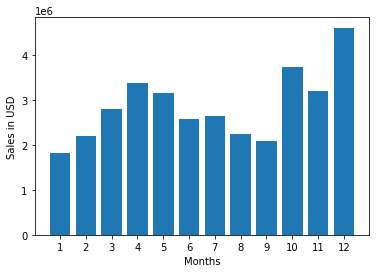

In [14]:
# plot df 
months = range(1,13)
plt.bar(x=months, height=sales_values)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

## Task 2: City with best sales

In [15]:
sample_adress= "944 Walnut St, Boston, MA 02215" # the adresses are seperated by ,
#function to split 
def getCity(sample_adress):
    return sample_adress.split(',')[1] # split and choose the second element
sample_adress = getCity(sample_adress)
sample_adress

' Boston'

In [16]:
df['City']= df['Purchase Address'].apply(getCity) # apply funtion to df
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [17]:
# find max element in df like above applied for sale_max
df.groupby('City').sum()['Sales'] # only want to dsplay Sales column
# save this in seperate df
city_values=df.groupby('City').sum()['Sales']
city_max = city_values.max()
print(city_values)
city_max

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64


8262203.910003961

In [18]:
cities_set= set(df['City'])
cities= df['City'].unique()
cities

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

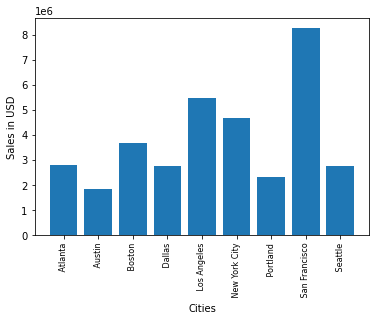

In [19]:
# plot df 
cities = [city for city, sales in city_values.items()]
plt.bar(x=cities, height=city_values)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()


## Task 3: Good time for displaying advertises to maximize the likelihood of customer's buying product 

In [28]:
# change to datatype "date time! to process this kind of data easier 
df['Order Date']= pd.to_datetime(df['Order Date'])
print (df['Order Date'].dtypes) # check type

datetime64[ns]


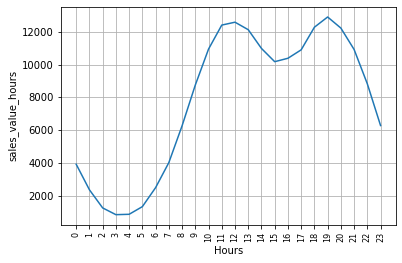

In [27]:
df['Hours']= df['Order Date'].dt.hour # to get hour from the type date time
# sales_value_hours= df.groupby('Hours').sum() ['Sales']  # with sum of sales
sales_value_hours= df.groupby('Hours').count() ['Sales']  # with number of sales
hours = [hours for hours, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours) # normally plt.bar(x=hours, height=sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('sales_value_hours')
plt.show()


## Task 4: Products most sold together (which have the sam Order ID)

In [22]:
def joinProduct(product):
    return ','.join(product)

In [23]:
df_dup= df['Order ID'].duplicated(keep=False) # False : Mark all duplicates as True.
# function return boolean Series denoting duplicate rows - false no duplicated/ true- duplicated
df_dup= df[df_dup]  # return df with only true displayed - only the duplicates are saved

# combine multiple rows with same value "Order ID" into one
df_dup['All_products']= df_dup.groupby('Order ID')['Product'].transform(', '.join)  # join the rows in column 'Product' with same ID into one with ', ' 
df_dup

<ipython-input-23-87820c4a8e26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All_products']= df_dup.groupby('Order ID')['Product'].transform(', '.join)  # join the rows in column 'Product' with same ID into one with ', '


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City,Hours,All_products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [24]:
# drop duplicates
df_dup[['Order ID', 'All_products']].drop_duplicates()

,Order ID,All_products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [25]:
# count number of values in column
df_dup['All_products'].value_counts(). head (10)

iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: All_products, dtype: int64

## Task 5: Products sold the most (biggest Quantity Ordered)

<ipython-input-26-46a513812fec>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


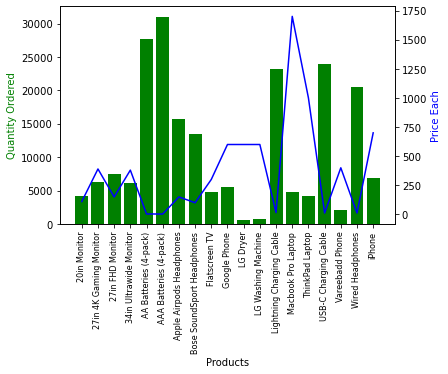

In [26]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
plt.show()
